In [1]:
import numpy as np
import pandas as pd
import pyodbc as podbc

In [2]:
conn = podbc.connect('Driver={ODBC Driver 17 for SQL Server};Server=DATAHAUS-COM;Database=VNB_Platform;uid=datahaus.com;pwd=datahaus@com22')

In [3]:
cursor = conn.cursor()

In [ ]:
sql = "SELECT *,CASE WHEN [DaysAgo] >= 0 AND [DaysAgo] <= 3 THEN 'Most Recent' WHEN [DaysAgo] >= 4 AND [DaysAgo] <= 7 THEN 'Mid High Recent' WHEN [DaysAgo] >= 8 AND [DaysAgo] <= 14 THEN 'Mid Recent' WHEN [DaysAgo] >= 15 THEN 'Least Recent' END AS [Recency]," \
+ " CASE WHEN [Total Deposit Count] >= 100 THEN 'Most Frequent' WHEN [Total Deposit Count] >= 21 AND [Total Deposit Count] <= 99 THEN 'Mid High Frequent' WHEN [Total Deposit Count] >= 2 AND [Total Deposit Count] <= 20 THEN 'Mid Frequent' WHEN [Total Deposit Count] >= 1 THEN '1 Time Deposit' END AS [Frequency]," \
+ " CASE WHEN [Win Amt] <= -5001 THEN 'Highest Revenue' WHEN [Win Amt] <= -1501 AND [Win Amt] >= -5000 THEN 'Mid High Revenue' WHEN [Win Amt] <= -1 AND [Win Amt] >= -1500 THEN 'Mid Revenue' WHEN [Win Amt] >= 0 THEN 'Lowest Revenue' END AS [Monetary]" \
+ " FROM ( SELECT [Player ID], [Registered Date], [Last Login], [Total Deposit Count], [Total Withdrawal Count], SUM(CONVERT(FLOAT,[Total Withdrawal])) + SUM(CONVERT(FLOAT,[Total Balance])) - SUM(CONVERT(FLOAT,[Total Deposit])) AS [Win Amt]," \
+ " DATEDIFF(DAY, CAST([Last Login] AS DATETIME), GETDATE()) AS DaysAgo FROM [dbo].[PActivity] WHERE [Last Status] = 'Last' GROUP BY [Player ID], [Registered Date], [Last Login], [Total Deposit Count], [Total Withdrawal Count]) AA ORDER BY [Player ID]"

In [ ]:
cursor.execute(sql)

In [ ]:
#data = cursor.fetchone()
#while data:
 #   print(str(data[0]) + ", " + ... + ", " + str(data[10-1]))
  #  data = cursor.fetchone()
    
#conn.close()

In [4]:
from sqlite3 import connect
from sqlalchemy import create_engine

In [5]:
engine = create_engine(
    'mssql+pyodbc://'
    '@./VNB_Platform?' # username:pwd@server:port/database
    'driver=ODBC+Driver+17+for+SQL+Server'
    )

In [6]:
sql = "SELECT *,CASE WHEN [DaysAgo] >= 0 AND [DaysAgo] <= 3 THEN 'Most Recent' WHEN [DaysAgo] >= 4 AND [DaysAgo] <= 7 THEN 'Mid High Recent' WHEN [DaysAgo] >= 8 AND [DaysAgo] <= 14 THEN 'Mid Recent' WHEN [DaysAgo] >= 15 THEN 'Least Recent' END AS [Recency]," \
+ " CASE WHEN [Total Deposit Count] >= 100 THEN 'Most Frequent' WHEN [Total Deposit Count] >= 21 AND [Total Deposit Count] <= 99 THEN 'Mid High Frequent' WHEN [Total Deposit Count] >= 2 AND [Total Deposit Count] <= 20 THEN 'Mid Frequent' WHEN [Total Deposit Count] >= 1 THEN '1 Time Deposit' END AS [Frequency]," \
+ " CASE WHEN [Win Amt] <= -5001 THEN 'Highest Revenue' WHEN [Win Amt] <= -1501 AND [Win Amt] >= -5000 THEN 'Mid High Revenue' WHEN [Win Amt] <= -1 AND [Win Amt] >= -1500 THEN 'Mid Revenue' WHEN [Win Amt] >= 0 THEN 'Lowest Revenue' END AS [Monetary]" \
+ " FROM ( SELECT [Player ID], [Registered Date], [Last Login], [Total Deposit Count], [Total Withdrawal Count], SUM(CONVERT(FLOAT,[Total Withdrawal])) + SUM(CONVERT(FLOAT,[Total Balance])) - SUM(CONVERT(FLOAT,[Total Deposit])) AS [Win Amt]," \
+ " DATEDIFF(DAY, CAST([Last Login] AS DATETIME), GETDATE()) AS DaysAgo FROM [dbo].[PActivity] WHERE [Last Status] = 'Last' GROUP BY [Player ID], [Registered Date], [Last Login], [Total Deposit Count], [Total Withdrawal Count]) AA ORDER BY [Player ID]"

In [7]:
sql_data = pd.read_sql(sql, engine)

In [8]:
sql_data.head()

,Player ID,Registered Date,Last Login,Total Deposit Count,Total Withdrawal Count,Win Amt,DaysAgo,Recency,Frequency,Monetary
0,010198,2022-12-30 20:01:28,2022-12-30 20:01:58,0,0,0.0,16,Least Recent,None,Lowest Revenue
1,01223450tg,2022-12-30 22:08:03,2022-12-30 22:08:03,0,0,0.0,16,Least Recent,None,Lowest Revenue
2,0167492644,2022-12-09 21:37:16,2022-12-09 21:37:15,0,0,0.0,37,Least Recent,None,Lowest Revenue
3,031093,2022-12-16 19:07:54,2022-12-16 19:07:54,0,0,0.0,30,Least Recent,None,Lowest Revenue
4,0327029990,2022-12-08 19:27:13,2022-12-08 19:27:13,0,0,0.0,38,Least Recent,None,Lowest Revenue


In [9]:
RList = sql_data.Recency.unique()
FList = sql_data.Frequency.unique()
MList = sql_data.Monetary.unique()
display("RList: ",RList,"FList: ",FList, "MList: ",MList)

'RList: '

array(['Least Recent', 'Mid Recent', 'Most Recent', 'Mid High Recent'],
      dtype=object)

'FList: '

array([None, '1 Time Deposit', 'Mid High Frequent', 'Mid Frequent',
       'Most Frequent'], dtype=object)

'MList: '

array(['Lowest Revenue', 'Mid Revenue', 'Mid High Revenue',
       'Highest Revenue', None], dtype=object)

In [10]:
RFM_List = sql_data[['Recency', 'Frequency', 'Monetary', 'Player ID']]
RFM_List

,Recency,Frequency,Monetary,Player ID
0,Least Recent,None,Lowest Revenue,010198
1,Least Recent,None,Lowest Revenue,01223450tg
2,Least Recent,None,Lowest Revenue,0167492644
3,Least Recent,None,Lowest Revenue,031093
4,Least Recent,None,Lowest Revenue,0327029990
...,...,...,...,...
12390,Mid Recent,None,Lowest Revenue,zzxxzzxzz
12391,Least Recent,None,Lowest Revenue,zzz227zzz
12392,Mid Recent,1 Time Deposit,Lowest Revenue,zzz6789
12393,Mid Recent,1 Time Deposit,Mid Revenue,zzzhpdzzz


,Recency,Player ID
0,Least Recent,8391
2,Mid Recent,2489
1,Mid High Recent,876
3,Most Recent,639


<AxesSubplot: >

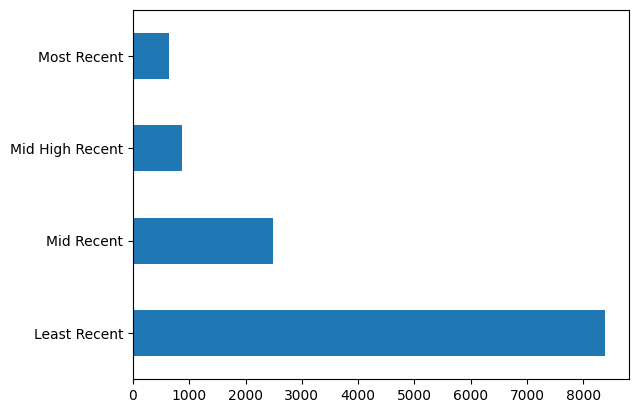

In [11]:
import matplotlib.pyplot as plt
display(RFM_List.groupby(['Recency'])['Player ID'].aggregate('count').reset_index().sort_values(['Player ID'], ascending = False))
sql_data.Recency.value_counts()[:4].plot(kind = 'barh')

,Frequency,Player ID
0,1 Time Deposit,1190
1,Mid Frequent,581
2,Mid High Frequent,50
3,Most Frequent,4


<AxesSubplot: >

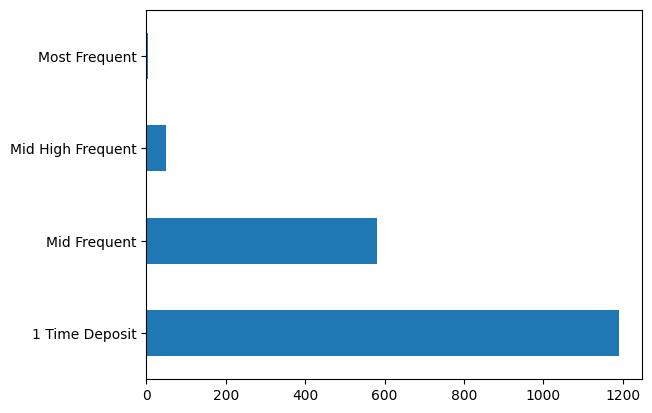

In [12]:
display(RFM_List.groupby(['Frequency'])['Player ID'].aggregate('count').reset_index().sort_values(['Player ID'], ascending = False))
sql_data.Frequency.value_counts()[:5].plot(kind = 'barh')

,Monetary,Player ID
1,Lowest Revenue,10973
3,Mid Revenue,1329
2,Mid High Revenue,62
0,Highest Revenue,30


<AxesSubplot: >

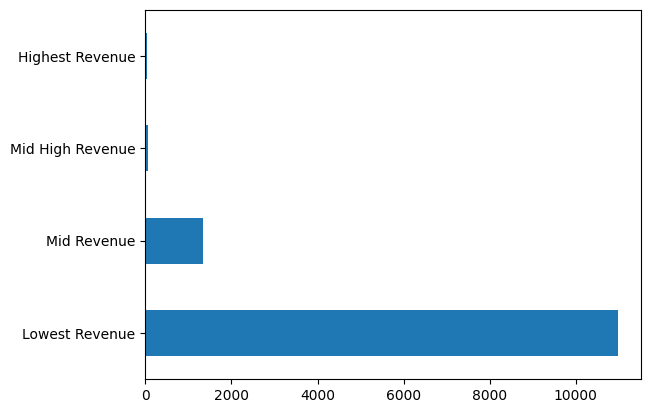

In [13]:
display(RFM_List.groupby(['Monetary'])['Player ID'].aggregate('count').reset_index().sort_values(['Player ID'], ascending = False))
sql_data.Monetary.value_counts()[:4].plot(kind = 'barh')

In [16]:
print("Total No.of Rows: ", sql_data.shape)
display(sql_data.describe())

Total No.of Rows:  (12395, 10)


,Win Amt,DaysAgo
count,12395.000000,12395.000000
mean,-13.468625,18.526180
std,1108.478541,9.856917
min,-49399.960000,3.000000
25%,0.000000,11.000000
50%,0.000000,17.000000
75%,0.000000,24.000000
max,51368.040000,61.000000


In [15]:
sql_data['Registered Date'] = pd.to_datetime(sql_data['Registered Date'])
sql_data['Last Login'] = pd.to_datetime(sql_data['Last Login'])

In [17]:
RFM = sql_data.groupby(['Player ID']).agg({ 'DaysAgo' : 'sum',
      'Total Deposit Count' : 'sum', 'Win Amt' : 'sum'
})
RFM.rename(columns = {'DaysAgo' : 'RR', 'Total Deposit Count' : 'FF', 'Win Amt' : 'MM'}, inplace = True)
display(RFM)

,RR,FF,MM
Player ID,,,
010198,16,0,0.00
01223450tg,16,0,0.00
0167492644,37,0,0.00
031093,30,0,0.00
0327029990,38,0,0.00
...,...,...,...
zzxxzzxzz,10,0,0.00
zzz227zzz,38,0,0.00
zzz6789,8,1,600.23


In [18]:
display(sql_data.head())
display(sql_data.shape)

,Player ID,Registered Date,Last Login,Total Deposit Count,Total Withdrawal Count,Win Amt,DaysAgo,Recency,Frequency,Monetary
0,010198,2022-12-30 20:01:28,2022-12-30 20:01:58,0,0,0.0,16,Least Recent,None,Lowest Revenue
1,01223450tg,2022-12-30 22:08:03,2022-12-30 22:08:03,0,0,0.0,16,Least Recent,None,Lowest Revenue
2,0167492644,2022-12-09 21:37:16,2022-12-09 21:37:15,0,0,0.0,37,Least Recent,None,Lowest Revenue
3,031093,2022-12-16 19:07:54,2022-12-16 19:07:54,0,0,0.0,30,Least Recent,None,Lowest Revenue
4,0327029990,2022-12-08 19:27:13,2022-12-08 19:27:13,0,0,0.0,38,Least Recent,None,Lowest Revenue


(12395, 10)

In [19]:
display(RFM)

,RR,FF,MM
Player ID,,,
010198,16,0,0.00
01223450tg,16,0,0.00
0167492644,37,0,0.00
031093,30,0,0.00
0327029990,38,0,0.00
...,...,...,...
zzxxzzxzz,10,0,0.00
zzz227zzz,38,0,0.00
zzz6789,8,1,600.23


In [20]:
print("Feature ", "\t Missing Values")
print(RFM.isnull().sum())

#sql_data = sql_data.dropna()

#print("\n After Dropping Missing Values \n")
#print("Feature ", "\t Missing Values")
#print(sql_data.isnull().sum())

Feature  	 Missing Values
RR    0
FF    0
MM    0
dtype: int64


In [21]:
#RFM = sql_data[['Player ID', 'Recency', 'Frequency', 'Monetary']]
#display(RFM)

display(RFM.describe())
display(RFM.dtypes)

,RR,MM
count,12395.000000,12395.000000
mean,18.526180,-13.468625
std,9.856917,1108.478541
min,3.000000,-49399.960000
25%,11.000000,0.000000
50%,17.000000,0.000000
75%,24.000000,0.000000
max,61.000000,51368.040000


RR      int64
FF     object
MM    float64
dtype: object

In [22]:
RFM['FF'] = pd.to_numeric(RFM['FF'], errors = 'coerce')

In [ ]:
#one_hot_encoded_data = pd.get_dummies(RFM, columns = ['Recency', 'Frequency', 'Monetary'])
#print(one_hot_encoded_data)

In [23]:
Duplicate_Rows = RFM[RFM.duplicated()]
print("No.of Duplicate rows: ", RFM.duplicated())
print("Duplicated Rows: ", Duplicate_Rows)

No.of Duplicate rows:  Player ID
010198        False
01223450tg     True
0167492644    False
031093        False
0327029990    False
              ...  
zzxxzzxzz      True
zzz227zzz      True
zzz6789       False
zzzhpdzzz     False
zzzthao1      False
Length: 12395, dtype: bool
Duplicated Rows:               RR  FF   MM
Player ID               
01223450tg   16   0  0.0
0328153600   18   0  0.0
0328308864   30   0  0.0
0329488573   18   0  0.0
0332136573   16   0  0.0
...          ..  ..  ...
zxbomzx      36   0  0.0
zzdoathonzz  15   0  0.0
zzkk1111     18   0  0.0
zzxxzzxzz    10   0  0.0
zzz227zzz    38   0  0.0

[10420 rows x 3 columns]


In [34]:
RFM = RFM.drop_duplicates()

In [35]:
display(RFM.describe())
print(RFM.shape)

,RR,FF,MM
count,1975.000000,1975.000000,1975.000000
mean,12.637975,3.300253,-77.973547
std,10.923705,9.835603,2776.440862
min,3.000000,0.000000,-49399.960000
25%,4.000000,1.000000,-199.175000
50%,9.000000,1.000000,-98.300000
75%,18.000000,2.000000,0.545000
max,61.000000,175.000000,51368.040000


(1975, 3)


C:\Users\datahaus.com\AppData\Local\Temp\ipykernel_8884\3953799080.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM['RR'])
C:\Users\datahaus.com\AppData\Local\Temp\ipykernel_8884\3953799080.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM['FF'])
C:\Users\datahaus.com\AppData\Local

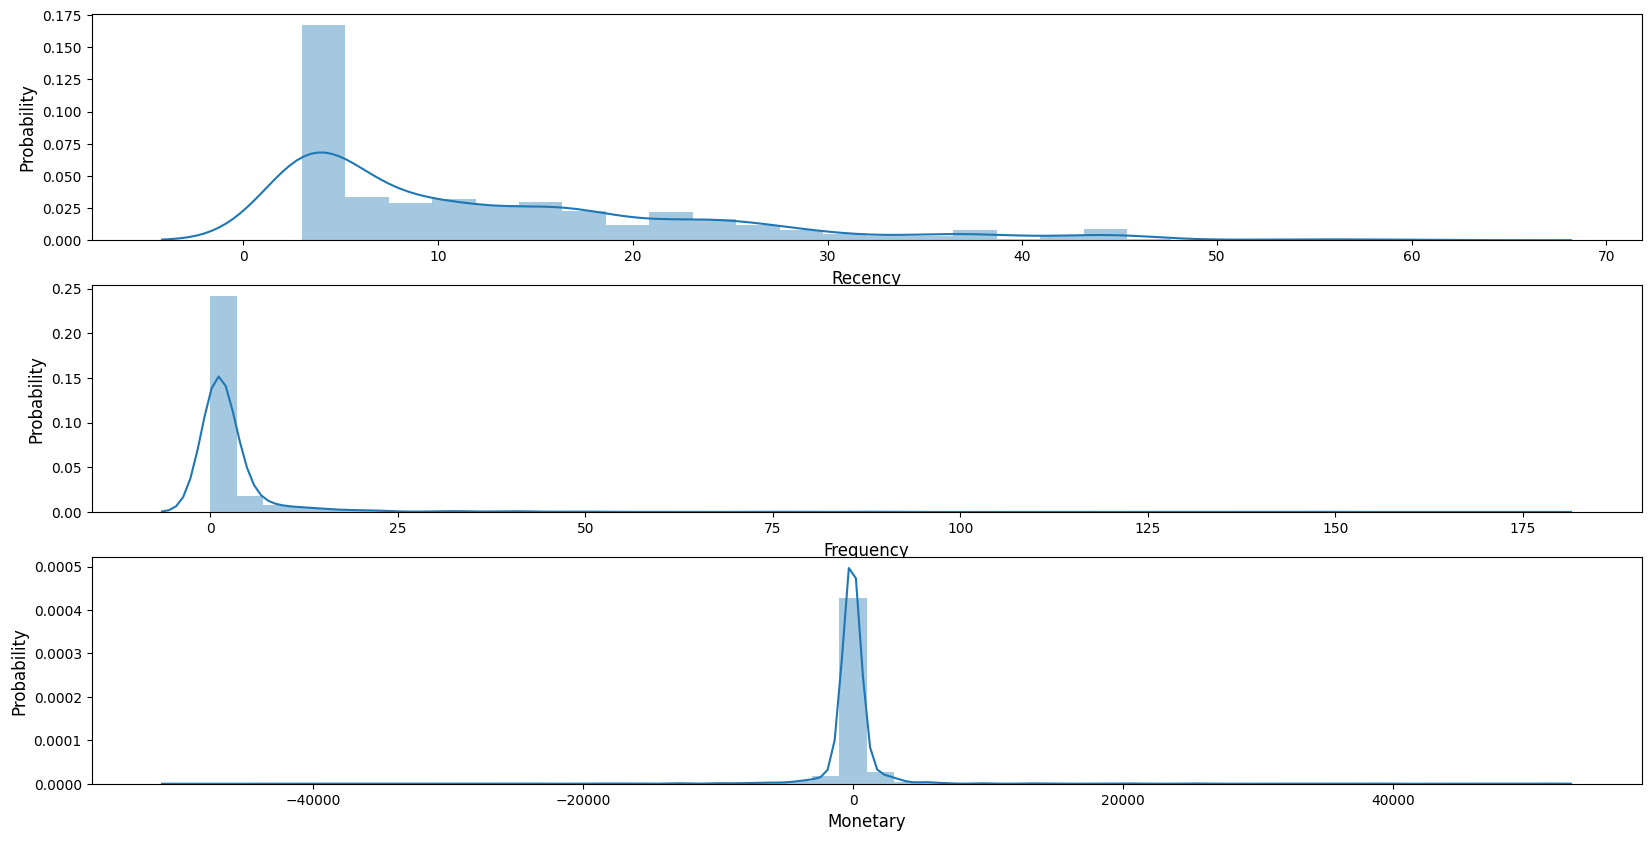

In [36]:
import seaborn as sns

plt.figure(figsize = (20,10))

plt.subplot(3, 1, 1);
sns.distplot(RFM['RR'])
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Recency', fontsize = 12)

plt.subplot(3, 1, 2);
sns.distplot(RFM['FF'])
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Frequency', fontsize = 12)

plt.subplot(3, 1, 3)
sns.distplot(RFM['MM'])
plt.ylabel('Probability', fontsize = 12)
plt.xlabel('Monetary', fontsize = 12)

plt.show()

In [38]:
Rlabel = range(4, 0, -1)
Flabel = range(1, 4)
Mlabel = range(1, 5)

Rgrp = pd.qcut(RFM['RR'], q = 4, labels = Rlabel, duplicates = 'drop')
Fgrp = pd.qcut(RFM['FF'], q = 4, labels = Flabel, duplicates = 'drop')
Mgrp = pd.qcut(RFM['MM'], q = 4, labels = Mlabel, duplicates = 'drop')

RFM['R'] = Rgrp.values
RFM['F'] = Fgrp.values
RFM['M'] = Mgrp.values

display(RFM)

,RR,FF,MM,R,F,M
Player ID,,,,,,
010198,16,0,0.00,2,1,3
0167492644,37,0,0.00,1,1,3
031093,30,0,0.00,1,1,3
0327029990,38,0,0.00,1,1,3
0327739078v,18,0,0.00,2,1,3
...,...,...,...,...,...,...
zznn93,10,2,-198.16,2,2,2
zznnvzz,5,2,-549.28,3,2,1
zzz6789,8,1,600.23,3,1,4


In [45]:
RFM['RFM_Concat'] = RFM.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
print(RFM.head())

             RR  FF   MM  R  F  M RFM_Concat
Player ID                                   
010198       16   0  0.0  2  1  3  2.01.03.0
0167492644   37   0  0.0  1  1  3  1.01.03.0
031093       30   0  0.0  1  1  3  1.01.03.0
0327029990   38   0  0.0  1  1  3  1.01.03.0
0327739078v  18   0  0.0  2  1  3  2.01.03.0


In [46]:
RFM['Score'] = RFM[['R', 'F', 'M']].sum(axis = 1)
display(RFM.head())
print("Maximun RFM Score: ", RFM['Score'].max())
print("Minimum RFM Score: ", RFM['Score'].min())

,RR,FF,MM,R,F,M,RFM_Concat,Score
Player ID,,,,,,,,
010198,16,0,0.0,2,1,3,2.01.03.0,6
0167492644,37,0,0.0,1,1,3,1.01.03.0,5
031093,30,0,0.0,1,1,3,1.01.03.0,5
0327029990,38,0,0.0,1,1,3,1.01.03.0,5
0327739078v,18,0,0.0,2,1,3,2.01.03.0,6


Maximun RFM Score:  11
Minimum RFM Score:  3


In [47]:
def rfm_level(df):
    if (df['Score'] > 10) : return 'VIP'
    elif (df['Score'] >= 7) and (df['Score'] <= 10) : return 'Loyal'
    elif (df['Score'] >= 3) and (df['Score'] < 7) : return 'Potential'
    else : return 'Needs attention'

In [48]:
RFM['RFM_Level'] = RFM.apply(rfm_level, axis = 1)
display(RFM.head())

,RR,FF,MM,R,F,M,RFM_Concat,Score,RFM_Level
Player ID,,,,,,,,,
010198,16,0,0.0,2,1,3,2.01.03.0,6,Potential
0167492644,37,0,0.0,1,1,3,1.01.03.0,5,Potential
031093,30,0,0.0,1,1,3,1.01.03.0,5,Potential
0327029990,38,0,0.0,1,1,3,1.01.03.0,5,Potential
0327739078v,18,0,0.0,2,1,3,2.01.03.0,6,Potential


In [49]:
RFM_stats = RFM.groupby(['RFM_Level']).agg({
    'RR' : 'mean',
    'FF' : 'mean',
    'MM' : ['mean', 'count']
}).round(1)

RFM_stats.columns = RFM_stats.columns.droplevel()
RFM_stats.columns = ['Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Monetary_Count']
display(RFM_stats)

,Recency_Mean,Frequency_Mean,Monetary_Mean,Monetary_Count
RFM_Level,,,,
Loyal,6.7,4.2,-240.4,891
Potential,18.8,1.3,-269.2,999
VIP,3.1,17.6,3871.8,85


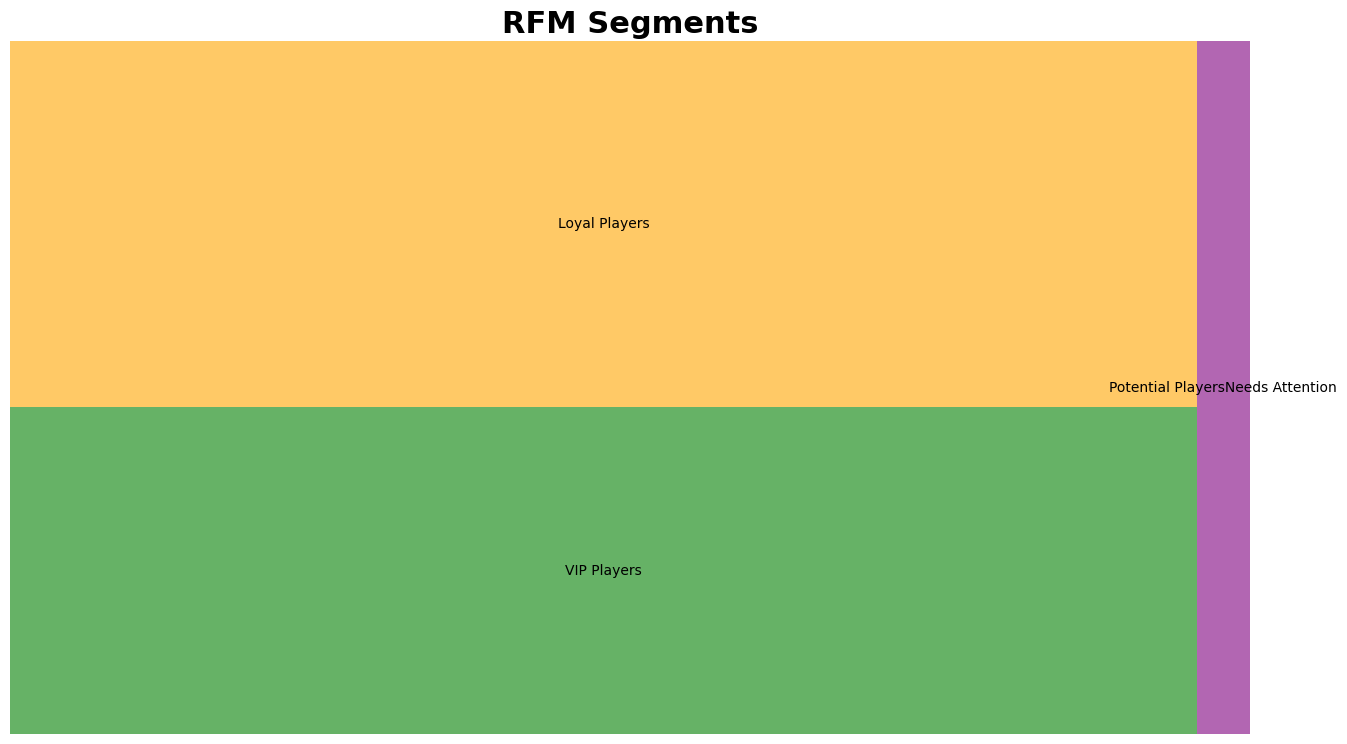

In [51]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes = RFM_stats['Monetary_Count'],
              label = ['VIP Players',
                       'Loyal Players',
                       'Potential Players'
                       'Needs Attention'
                      ],
              color = ["Green", "Orange", "Purple", "Maroon"],
              alpha = .6
             )
plt.title("RFM Segments", fontsize = 22, fontweight = "bold")
plt.axis("off")
plt.show()